> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Trends to be explored here are:
- Popularity over the years
- Revenue over the years
- Runtime over the years

> Associations and Effects [over period spans] to be evaluated are:
- Runtime vs Popularity 
- Runtime vs Revenue 
- Revenue vs Popularity


In [107]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Data is relatively clean.
- Rows with missing imdb ids are dropped
- Other values with missing values are not significant, hence , not dropped.

### General Properties

In [109]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [110]:
sum(df.duplicated())

1

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [113]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Dropping rows)

In [114]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#removing rows with null values in imdb_id column
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [115]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
- How are runtimes, budgets and revenues trending over time?
- Are the variables: runtimes, budgets, revenues related to popularity?

In [116]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [117]:
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,2.005860e+06,1.308805e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,1.251191e+06,1.842102e+06,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,17429.700000,0.471154,2.516305e+06,1.844587e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,18628.589744,0.484202,1.844590e+06,6.788025e+06,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07


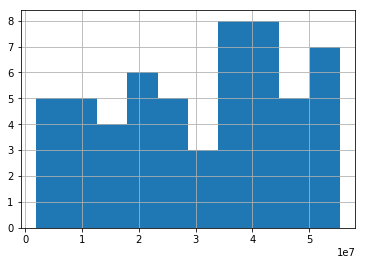

In [118]:
df.groupby('release_year').mean()['revenue'].hist()

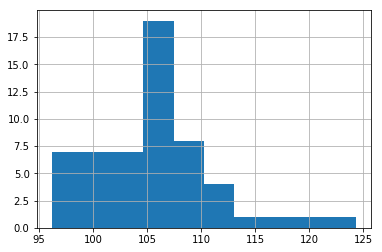

In [119]:
df.groupby('release_year').mean()['runtime'].hist()

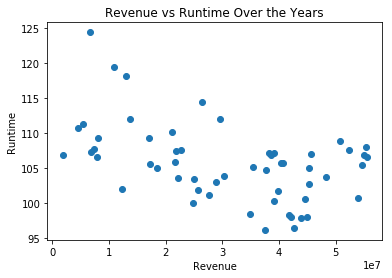

In [120]:
df_yr_mean = df.groupby('release_year').mean()
plt.scatter(x=df_yr_mean['revenue'], y=df_yr_mean['runtime'])
plt.xlabel('Revenue')
plt.ylabel('Runtime')
plt.title('Revenue vs Runtime Over the Years');

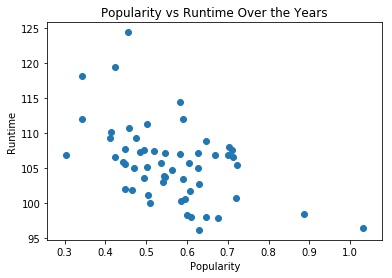

In [122]:
plt.scatter(x=df_yr_mean['popularity'], y=df_yr_mean['runtime'])
plt.xlabel('Popularity')
plt.ylabel('Runtime')
plt.title('Popularity vs Runtime Over the Years');

In [123]:
df_yr_mean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,56.000000,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,32165.603433,0.559693,9.833150e+06,3.076766e+07,105.714644,156.556414,6.104371,1.557752e+07,6.032251e+07
std,52448.343738,0.128434,8.023062e+06,1.574209e+07,5.508458,74.084952,0.200420,7.326850e+06,2.160738e+07
min,13496.075188,0.304112,6.892796e+05,1.842102e+06,96.179331,31.739130,5.795392,4.729510e+06,1.237527e+07
25%,15703.352791,0.469625,2.426431e+06,1.815642e+07,101.910776,98.832785,5.958838,1.088323e+07,4.633366e+07
50%,17469.025000,0.546928,6.906936e+06,3.257984e+07,105.678699,139.040793,6.041295,1.390314e+07,5.802844e+07
75%,19105.754121,0.626934,1.645743e+07,4.293171e+07,107.593247,206.899610,6.242106,1.797158e+07,6.832655e+07
max,296669.068471,1.032126,2.573766e+07,5.549569e+07,124.343750,325.949848,6.703636,3.369195e+07,1.376362e+08


In [124]:
# Bin edges that will be used to "cut" the data into groups are based on the quartile percentages
bin_edges = [ 0.304112, 0.469625,0.546928 , 0.626934,1.032126 ] # Adding five values from above
# Labels for the four acidity level groups
bin_names = [ 'Poor','Low' ,'Medium' ,'High' ] # Naming popularity as Poor to High


In [125]:
# Creates popularity divisions
df_yr_mean['popularity_levels'] = pd.cut(df_yr_mean['popularity'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_yr_mean.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,popularity_levels
release_year,,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07,Poor
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07,Poor
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07,Poor
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07,Low
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07,Poor


In [126]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,65959.191617,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,5.973865,2001.313128,1.756606e+07,5.141632e+07
std,92018.246342,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,0.934604,12.815672,3.431919e+07,1.446965e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10591.500000,0.207733,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20618.000000,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75393.500000,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.374346e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [127]:
df_yr = df

df_yr.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [128]:
# Creates popularity divisions
df_yr['release_year'] = pd.cut(df_yr['release_year'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_yr.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,NaN,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,NaN,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,NaN,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,NaN,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,NaN,1.747999e+08,1.385749e+09


In [130]:
df_yr.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,-0.013765,-0.141048,-0.099015,-0.086610,-0.035202,-0.060124,-0.188759,-0.138319
popularity,-0.013765,1.000000,0.545409,0.663330,0.138859,0.800817,0.210306,0.513470,0.609044
budget,-0.141048,0.545409,1.000000,0.734895,0.191111,0.632667,0.081740,0.968957,0.622477
revenue,-0.099015,0.663330,0.734895,1.000000,0.162727,0.791152,0.173147,0.706409,0.919100
runtime,-0.086610,0.138859,0.191111,0.162727,1.000000,0.163170,0.158340,0.220949,0.175570
vote_count,-0.035202,0.800817,0.632667,0.791152,0.163170,1.000000,0.254528,0.587001,0.707908
vote_average,-0.060124,0.210306,0.081740,0.173147,0.158340,0.254528,1.000000,0.093815,0.193709
budget_adj,-0.188759,0.513470,0.968957,0.706409,0.220949,0.587001,0.093815,1.000000,0.646575
revenue_adj,-0.138319,0.609044,0.622477,0.919100,0.175570,0.707908,0.193709,0.646575,1.000000


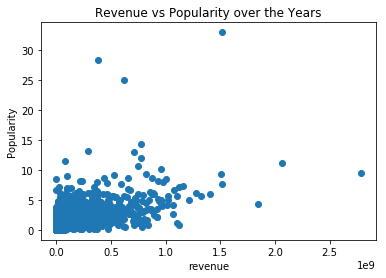

In [135]:
plt.scatter(x=df_yr['revenue'], y=df_yr['popularity'])
plt.xlabel('revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity over the Years');

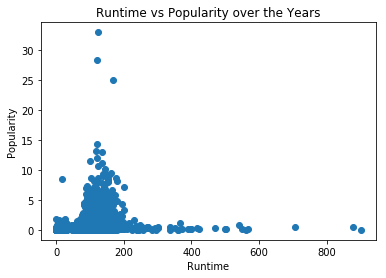

In [136]:
plt.scatter(x=df_yr['runtime'], y=df_yr['popularity'])
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title('Runtime vs Popularity over the Years');

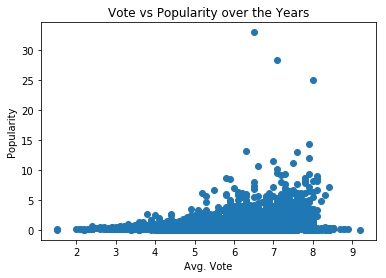

In [137]:
plt.scatter(x=df_yr['vote_average'], y=df_yr['popularity'])
plt.xlabel('Avg. Vote')
plt.ylabel('Popularity')
plt.title('Vote vs Popularity over the Years');

### Research Question 2  
What features are associated with higher revenue?

In [138]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [139]:
df.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,-0.013765,-0.141048,-0.099015,-0.086610,-0.035202,-0.060124,-0.188759,-0.138319
popularity,-0.013765,1.000000,0.545409,0.663330,0.138859,0.800817,0.210306,0.513470,0.609044
budget,-0.141048,0.545409,1.000000,0.734895,0.191111,0.632667,0.081740,0.968957,0.622477
revenue,-0.099015,0.663330,0.734895,1.000000,0.162727,0.791152,0.173147,0.706409,0.919100
runtime,-0.086610,0.138859,0.191111,0.162727,1.000000,0.163170,0.158340,0.220949,0.175570
vote_count,-0.035202,0.800817,0.632667,0.791152,0.163170,1.000000,0.254528,0.587001,0.707908
vote_average,-0.060124,0.210306,0.081740,0.173147,0.158340,0.254528,1.000000,0.093815,0.193709
budget_adj,-0.188759,0.513470,0.968957,0.706409,0.220949,0.587001,0.093815,1.000000,0.646575
revenue_adj,-0.138319,0.609044,0.622477,0.919100,0.175570,0.707908,0.193709,0.646575,1.000000


As seen above:
- revenue and popularity are positively related :0.663330
- revenue and vote counts are positively related :0.791152

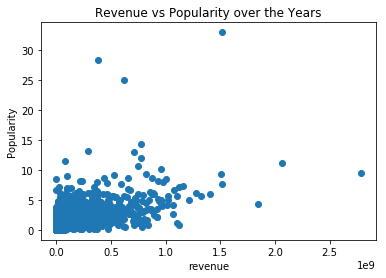

In [140]:
plt.scatter(x=df['revenue'], y=df['popularity'])
plt.xlabel('revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity over the Years');

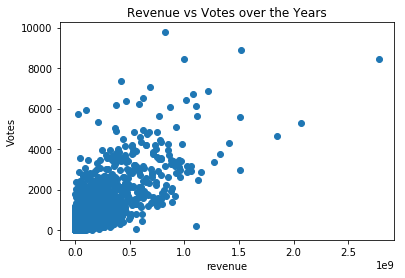

In [141]:
plt.scatter(x=df['revenue'], y=df['vote_count'])
plt.xlabel('revenue')
plt.ylabel('Votes')
plt.title('Revenue vs Votes over the Years');

<a id='conclusions'></a>
## Conclusions
<ul>
<li>From our EDA, we discovered that there are patterns to runtimes, popularity and revenues of directors.</li>
<li>While only tentative, we found that popular runtimes range between 100 and 180 minutes.</li>
<li>Also, ratings for directors had maximum likelihood of being in the 0 to 1 range.</li></ul>

In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0